In [64]:
from numpy import pi
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit_textbook.tools import array_to_latex

In [65]:
def add_qft_rotations(qc, n):
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(pi/2**(n-qubit), qubit, n)
    add_qft_rotations(qc, n)

def add_qft_swaps(qc, n):
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    return qc

def make_qft(n, swaps):
    qc = QuantumCircuit(n)
    add_qft_rotations(qc, n)
    if swaps:
        add_qft_swaps(qc, n)
    return qc

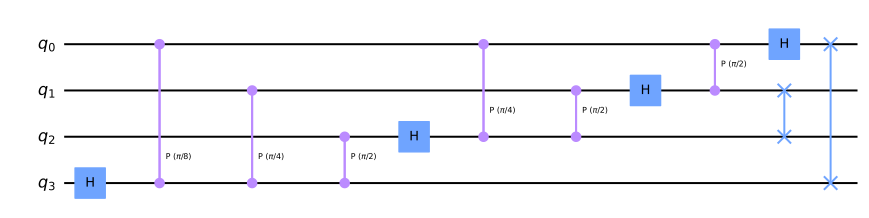

In [66]:
qc = make_qft(n=4, swaps=True)
qc.draw()

In [67]:
def apply_qft(n, value, swaps):
    qc = QuantumCircuit(n)
    bin_value = bin(value)[2:].zfill(n)
    qc.initialize(bin_value, qc.qubits)
    qft = make_qft(n, swaps)
    qc = qc.compose(qft)
    display(qc.draw())
    sim = Aer.get_backend("aer_simulator")
    qc.save_statevector()
    statevector = sim.run(qc).result().get_statevector()
    display(plot_bloch_multivector(statevector))
    array_to_latex(statevector, pretext="\\text{Statevector} = ")
    return statevector


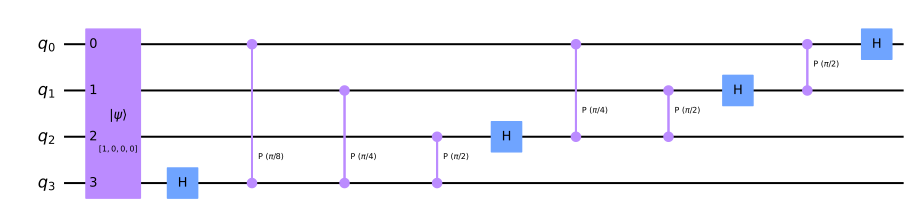

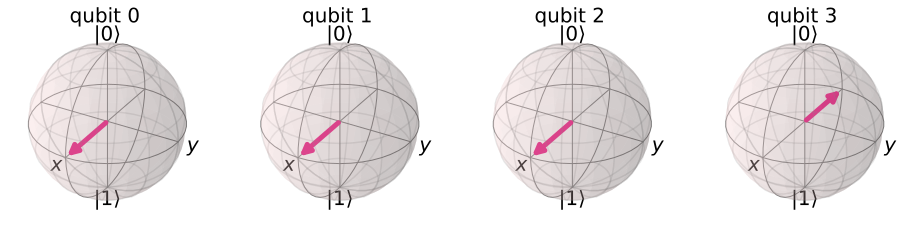

<IPython.core.display.Math object>

[ 0.25-3.061617e-17j  0.25-3.061617e-17j  0.25-3.061617e-17j
  0.25-3.061617e-17j  0.25-3.061617e-17j  0.25-3.061617e-17j
  0.25-3.061617e-17j  0.25-3.061617e-17j -0.25+3.061617e-17j
 -0.25+3.061617e-17j -0.25+3.061617e-17j -0.25+3.061617e-17j
 -0.25+3.061617e-17j -0.25+3.061617e-17j -0.25+3.061617e-17j
 -0.25+3.061617e-17j]


In [68]:
n = 4
value = 9
swaps = False

statevector = apply_qft(n, value, swaps)
print(statevector.data)

Show density matrices:

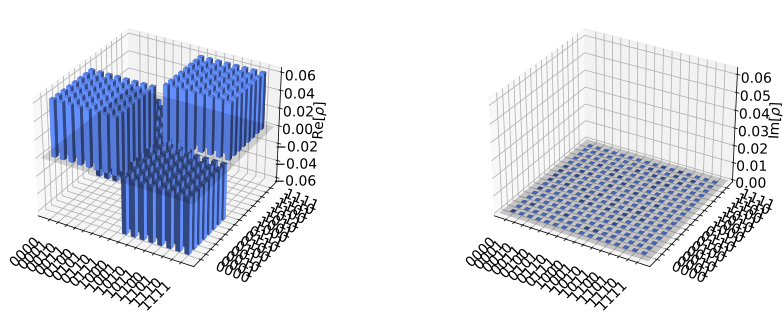

Density matrix = 
 0.063  0.000j     0.063  0.000j     0.063  0.000j     0.062  0.000j    
 0.063  0.000j     0.062  0.000j     0.062  0.000j     0.062  0.000j    
 0.063  0.000j     0.062  0.000j     0.062  0.000j     0.062  0.000j    
 0.062  0.000j     0.062  0.000j     0.062  0.000j     0.062  0.000j    


In [69]:
from utils import *

# The city plot is shown in the native Qiskit bit order
display(plot_state_city(statevector))

# The numerical matrix is shown in the QNE reversed bit order
print("Density matrix = ")
density_matrix = DensityMatrix(statevector).data
density_matrix = dm_reverse_bit_order(2, density_matrix)
pretty_print_dm(2, density_matrix)



In [70]:
from datetime import datetime
dir = "/Users/brunorijsman/git-personal/quantum-internet-hackathon-2022"
with open(f"{dir}/qiskit_dm.txt", "w") as f:
    print(f"Qiskit density matrix", file=f)
    print(f"{datetime.now()}", file=f)
    print(f"{n}", file=f)
    print(f"{value}", file=f)
    print("False", file=f)
    for r in range(n):
        for c in range(n):
            print(density_matrix[r][c], file=f)